In [3]:
import sys, os
sys.path.append('..')

from dataset import load_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import utils
from utils import eval_model, visualize_model, train_model
import models
import torchvision.models as models
import train as t
import const
import matplotlib.pyplot as plt

print(torch.cuda.get_device_name(0))

%load_ext autoreload
%autoreload 2

use_gpu = torch.cuda.is_available()
if use_gpu:
    device = torch.device('cuda')
    print ("using CUDA")
else:
    device = torch.device('cpu')
    
print(use_gpu)

Tesla K80
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using CUDA
True


In [4]:
train_data, val_data, test_data = load_data()

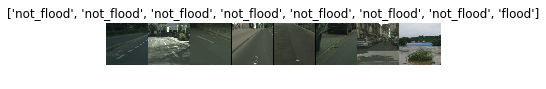

In [5]:
inputs, classes = next(iter(train_data))
utils.show_databatch(inputs, classes)

In [6]:
# load in resnet18 model
rn18 = models.resnet18(pretrained=True)
num_ftrs = rn18.fc.in_features
rn18.fc = nn.Linear(num_ftrs, len(const.CLASS_NAMES))

print(rn18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [7]:
optimizer_ft = optim.Adam(rn18.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

if use_gpu:
    criterion.cuda()
    rn18.cuda()

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [8]:
print("Test before training")
eval_model(rn18, test_data, criterion)

Test before training
Evaluating model
----------


0it [00:00, ?it/s]

Test batch 0/218

100it [00:37,  2.94it/s]

Test batch 100/218

199it [01:12,  1.97it/s]

Test batch 200/218

218it [01:18,  2.78it/s]


Evaluation completed in 1m 20s
Avg loss (test): 0.1648
Avg acc (test): 0.3548
----------


0it [00:00, ?it/s]

Ground truth:


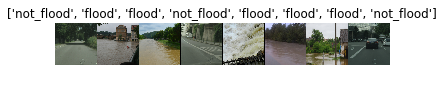

Prediction:


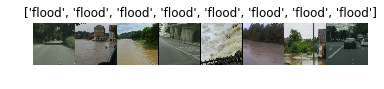

In [9]:
visualize_model(rn18, test_data) 

In [10]:
rn18_trained, loss_hist, train_acc_hist, val_acc_hist = train_model(train_data, val_data, rn18, criterion, optimizer_ft, exp_lr_scheduler, 10)
print (rn18_trained)
torch.save(rn18_trained.state_dict(), 'rn_train.pt')

Epoch 1/10
----------


0it [00:00, ?it/s]

Training batch 0/327.0

100it [00:38,  3.50it/s]

Training batch 100/327.0

200it [01:16,  1.75it/s]

Training batch 200/327.0

300it [01:53,  1.76it/s]

Training batch 300/327.0

327it [02:02,  3.93it/s]


tensor(2385, device='cuda:0')
Validation batch 0/218

../utils/utils.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)


Validation batch 200/218
Epoch 1 result: 
Avg loss (train): 0.0272
Avg acc (train): 0.9127
Avg loss (val): 0.0159
Avg acc (val): 0.9472
----------

Epoch 2/10
----------



0it [00:00, ?it/s]

Training batch 0/327.0


1it [00:01,  1.28s/it]
2it [00:01,  1.00it/s]
3it [00:01,  1.31it/s]
4it [00:01,  1.72it/s]
5it [00:02,  1.78it/s]
6it [00:03,  1.54it/s]
7it [00:03,  2.00it/s]
8it [00:03,  2.49it/s]
9it [00:03,  2.97it/s]
10it [00:04,  1.78it/s]
11it [00:05,  2.30it/s]
12it [00:05,  2.73it/s]
13it [00:05,  3.16it/s]
14it [00:06,  2.15it/s]
15it [00:06,  2.55it/s]
16it [00:06,  3.10it/s]
17it [00:07,  2.80it/s]
18it [00:07,  2.06it/s]
19it [00:08,  2.56it/s]
20it [00:08,  3.15it/s]
21it [00:09,  1.99it/s]
22it [00:09,  2.52it/s]
23it [00:09,  3.03it/s]
24it [00:09,  3.66it/s]
25it [00:11,  1.65it/s]
26it [00:11,  2.06it/s]
27it [00:11,  2.59it/s]
28it [00:11,  2.97it/s]
29it [00:12,  2.09it/s]
30it [00:12,  2.65it/s]
31it [00:12,  3.16it/s]
32it [00:12,  3.72it/s]
33it [00:14,  1.74it/s]
34it [00:14,  2.27it/s]
35it [00:14,  2.85it/s]
36it [00:14,  3.43it/s]
37it [00:15,  2.02it/s]
38it [00:15,  2.59it/s]
39it [00:15,  3.13it/s]
40it [00:16,  3.60it/s]
41it [00:17,  1.92it/s]
42it [00:17,  2.41it/s]


Training batch 100/327.0


101it [00:37,  2.35it/s]
102it [00:37,  2.92it/s]
103it [00:37,  2.91it/s]
104it [00:37,  3.59it/s]
105it [00:38,  2.14it/s]
106it [00:38,  2.59it/s]
107it [00:39,  2.71it/s]
108it [00:39,  3.26it/s]
109it [00:40,  1.89it/s]
110it [00:40,  2.40it/s]
111it [00:40,  2.93it/s]
112it [00:41,  3.40it/s]
113it [00:42,  1.80it/s]
114it [00:42,  2.35it/s]
115it [00:42,  2.75it/s]
116it [00:42,  3.21it/s]
117it [00:43,  1.83it/s]
118it [00:43,  2.33it/s]
119it [00:44,  2.77it/s]
120it [00:44,  3.34it/s]
121it [00:45,  1.85it/s]
122it [00:45,  2.39it/s]
123it [00:45,  2.83it/s]
124it [00:45,  3.24it/s]
125it [00:47,  1.67it/s]
126it [00:47,  2.16it/s]
127it [00:47,  2.70it/s]
128it [00:47,  3.20it/s]
129it [00:48,  2.23it/s]
130it [00:48,  2.70it/s]
131it [00:48,  3.16it/s]
132it [00:49,  3.66it/s]
133it [00:49,  3.05it/s]
134it [00:49,  3.60it/s]
135it [00:49,  4.19it/s]
136it [00:49,  4.67it/s]
137it [00:51,  1.96it/s]
138it [00:51,  2.50it/s]
139it [00:51,  2.97it/s]
140it [00:51,  3.59it/s]

Training batch 200/327.0


201it [01:16,  2.16it/s]
202it [01:16,  2.73it/s]
203it [01:16,  3.20it/s]
204it [01:17,  2.21it/s]
205it [01:17,  2.67it/s]
206it [01:18,  3.24it/s]
207it [01:18,  3.60it/s]
208it [01:19,  1.79it/s]
209it [01:19,  2.22it/s]
210it [01:19,  2.84it/s]
211it [01:20,  3.21it/s]
212it [01:20,  2.96it/s]
213it [01:20,  3.52it/s]
214it [01:20,  3.31it/s]
215it [01:21,  3.84it/s]
216it [01:21,  3.43it/s]
217it [01:21,  4.03it/s]
218it [01:22,  2.72it/s]
219it [01:22,  3.22it/s]
220it [01:22,  2.83it/s]
221it [01:23,  2.79it/s]
222it [01:24,  2.06it/s]
223it [01:24,  2.59it/s]
224it [01:24,  3.04it/s]
225it [01:24,  2.87it/s]
226it [01:25,  2.14it/s]
227it [01:25,  2.65it/s]
228it [01:26,  2.74it/s]
229it [01:26,  2.88it/s]
230it [01:26,  2.40it/s]
231it [01:27,  2.84it/s]
232it [01:27,  3.21it/s]
233it [01:27,  2.60it/s]
234it [01:28,  1.95it/s]
235it [01:28,  2.47it/s]
236it [01:28,  3.08it/s]
237it [01:29,  3.22it/s]
238it [01:30,  1.92it/s]
239it [01:30,  2.44it/s]
240it [01:30,  3.00it/s]

Training batch 300/327.0


301it [01:54,  2.38it/s]
302it [01:54,  2.98it/s]
303it [01:54,  3.58it/s]
304it [01:55,  1.83it/s]
305it [01:55,  2.38it/s]
306it [01:56,  2.95it/s]
307it [01:56,  3.49it/s]
308it [01:57,  1.86it/s]
309it [01:57,  2.38it/s]
310it [01:57,  2.90it/s]
311it [01:57,  3.47it/s]
312it [01:58,  2.05it/s]
313it [01:58,  2.58it/s]
314it [01:59,  3.19it/s]
315it [01:59,  3.86it/s]
316it [02:00,  1.81it/s]
317it [02:00,  2.28it/s]
318it [02:00,  2.92it/s]
319it [02:00,  3.56it/s]
320it [02:01,  2.36it/s]
321it [02:01,  2.76it/s]
322it [02:02,  3.38it/s]
323it [02:02,  3.89it/s]
324it [02:03,  2.22it/s]
325it [02:03,  2.74it/s]
326it [02:03,  3.24it/s]
327it [02:03,  3.95it/s]


tensor(2463, device='cuda:0')
Validation batch 200/218
Epoch 2 result: 
Avg loss (train): 0.0160
Avg acc (train): 0.9426
Avg loss (val): 0.0180
Avg acc (val): 0.9374
----------

Epoch 3/10
----------




0it [00:00, ?it/s]

Training batch 0/327.0



1it [00:00,  1.26it/s]

2it [00:01,  1.55it/s]

3it [00:01,  1.42it/s]

4it [00:02,  1.86it/s]

5it [00:02,  2.35it/s]

6it [00:02,  2.80it/s]

7it [00:03,  2.26it/s]

8it [00:03,  2.70it/s]

9it [00:03,  3.15it/s]

10it [00:03,  3.62it/s]

11it [00:04,  1.86it/s]

12it [00:04,  2.38it/s]

13it [00:05,  2.89it/s]

14it [00:05,  3.48it/s]

15it [00:06,  1.79it/s]

16it [00:06,  2.28it/s]

17it [00:07,  2.37it/s]

18it [00:07,  2.87it/s]

19it [00:07,  2.10it/s]

20it [00:08,  2.52it/s]

21it [00:08,  2.83it/s]

22it [00:08,  3.38it/s]

23it [00:09,  1.97it/s]

24it [00:09,  2.50it/s]

25it [00:09,  2.93it/s]

26it [00:10,  3.55it/s]

27it [00:10,  3.13it/s]

28it [00:10,  3.71it/s]

29it [00:11,  2.79it/s]

30it [00:11,  3.27it/s]

31it [00:11,  3.62it/s]

32it [00:11,  3.95it/s]

33it [00:12,  3.84it/s]

34it [00:12,  2.51it/s]

35it [00:13,  2.91it/s]

36it [00:13,  3.27it/s]

37it [00:13,  3.67it/s]

38it [00:14,  1.65it/s]

39it [00:15,  2.01it/s]

40it [00:15,  2.47it/s]

41it [0

Training batch 100/327.0



101it [00:38,  2.06it/s]

102it [00:38,  2.61it/s]

103it [00:38,  3.02it/s]

104it [00:38,  3.50it/s]

105it [00:39,  1.97it/s]

106it [00:39,  2.49it/s]

107it [00:39,  3.03it/s]

108it [00:40,  3.38it/s]

109it [00:41,  2.04it/s]

110it [00:41,  2.56it/s]

111it [00:41,  3.08it/s]

112it [00:41,  3.52it/s]

113it [00:42,  2.41it/s]

114it [00:42,  2.98it/s]

115it [00:42,  3.46it/s]

116it [00:42,  4.02it/s]

117it [00:43,  2.17it/s]

118it [00:43,  2.74it/s]

119it [00:44,  3.23it/s]

120it [00:44,  3.78it/s]

121it [00:45,  1.95it/s]

122it [00:45,  2.41it/s]

123it [00:45,  2.86it/s]

124it [00:45,  3.35it/s]

125it [00:46,  2.92it/s]

126it [00:46,  3.48it/s]

127it [00:47,  2.87it/s]

128it [00:47,  3.25it/s]

129it [00:48,  1.60it/s]

130it [00:48,  2.03it/s]

131it [00:48,  2.50it/s]

132it [00:49,  2.94it/s]

133it [00:49,  2.12it/s]

134it [00:50,  2.63it/s]

135it [00:50,  2.97it/s]

136it [00:50,  3.66it/s]

137it [00:51,  2.48it/s]

138it [00:51,  2.93it/s]

139it [00:

Training batch 200/327.0



201it [01:15,  2.51it/s]

202it [01:15,  2.96it/s]

203it [01:15,  3.35it/s]

204it [01:15,  3.40it/s]

205it [01:16,  2.19it/s]

206it [01:16,  2.70it/s]

207it [01:16,  3.14it/s]

208it [01:17,  2.30it/s]

209it [01:17,  2.84it/s]

210it [01:18,  3.29it/s]

211it [01:18,  3.79it/s]

212it [01:19,  2.26it/s]

213it [01:19,  2.68it/s]

214it [01:19,  3.16it/s]

215it [01:19,  3.62it/s]

216it [01:20,  3.23it/s]

217it [01:20,  2.50it/s]

218it [01:20,  2.98it/s]

219it [01:20,  3.58it/s]

220it [01:22,  1.83it/s]

221it [01:22,  2.29it/s]

222it [01:22,  2.59it/s]

223it [01:22,  3.13it/s]

224it [01:23,  1.84it/s]

225it [01:23,  2.31it/s]

226it [01:24,  2.84it/s]

227it [01:24,  3.30it/s]

228it [01:25,  2.02it/s]

229it [01:25,  2.48it/s]

230it [01:25,  2.69it/s]

231it [01:25,  3.26it/s]

232it [01:26,  2.07it/s]

233it [01:26,  2.58it/s]

234it [01:27,  2.11it/s]

235it [01:27,  2.55it/s]

236it [01:28,  2.19it/s]

237it [01:28,  2.73it/s]

238it [01:29,  2.39it/s]

239it [01:

Training batch 300/327.0



301it [01:52,  2.32it/s]

302it [01:52,  2.81it/s]

303it [01:52,  3.25it/s]

304it [01:52,  3.80it/s]

305it [01:53,  2.09it/s]

306it [01:54,  2.48it/s]

307it [01:54,  2.98it/s]

308it [01:54,  3.61it/s]

309it [01:55,  2.16it/s]

310it [01:55,  2.49it/s]

311it [01:55,  3.02it/s]

312it [01:55,  3.46it/s]

313it [01:56,  2.04it/s]

314it [01:57,  2.37it/s]

315it [01:57,  2.90it/s]

316it [01:57,  3.52it/s]

317it [01:58,  2.21it/s]

318it [01:58,  2.52it/s]

319it [01:58,  3.05it/s]

320it [01:58,  3.53it/s]

321it [01:59,  2.88it/s]

322it [02:00,  2.29it/s]

323it [02:00,  2.80it/s]

324it [02:00,  3.30it/s]

325it [02:01,  2.32it/s]

326it [02:01,  2.47it/s]

327it [02:01,  3.06it/s]


tensor(2473, device='cuda:0')
Validation batch 200/218
Epoch 3 result: 
Avg loss (train): 0.0171
Avg acc (train): 0.9464
Avg loss (val): 0.0154
Avg acc (val): 0.9506
----------

Epoch 4/10
----------





0it [00:00, ?it/s]

Training batch 0/327.0




1it [00:01,  1.95s/it]


2it [00:02,  1.42s/it]


3it [00:02,  1.05s/it]


4it [00:02,  1.26it/s]


5it [00:03,  1.38it/s]


6it [00:03,  1.76it/s]


7it [00:03,  2.16it/s]


8it [00:03,  2.62it/s]


9it [00:04,  2.77it/s]


10it [00:04,  3.10it/s]


11it [00:04,  3.04it/s]


12it [00:05,  2.44it/s]


13it [00:05,  3.02it/s]


14it [00:05,  2.64it/s]


15it [00:06,  2.87it/s]


16it [00:06,  2.55it/s]


17it [00:06,  3.10it/s]


18it [00:07,  2.59it/s]


19it [00:07,  2.99it/s]


20it [00:07,  3.01it/s]


21it [00:07,  3.55it/s]


22it [00:08,  2.89it/s]


23it [00:09,  2.34it/s]


24it [00:09,  2.28it/s]


25it [00:09,  2.72it/s]


26it [00:10,  3.07it/s]


27it [00:10,  3.24it/s]


28it [00:10,  3.64it/s]


29it [00:10,  3.89it/s]


30it [00:11,  3.08it/s]


31it [00:11,  3.42it/s]


32it [00:11,  2.98it/s]


33it [00:12,  3.38it/s]


34it [00:12,  2.34it/s]


35it [00:12,  2.80it/s]


36it [00:13,  2.27it/s]


37it [00:13,  2.86it/s]


38it [00:14,  2.64it/s]


39it [00:14,  2.74

Training batch 100/327.0




101it [00:37,  3.65it/s]


102it [00:37,  2.77it/s]


103it [00:37,  3.27it/s]


104it [00:38,  3.63it/s]


105it [00:38,  4.02it/s]


106it [00:39,  2.14it/s]


107it [00:39,  2.59it/s]


108it [00:39,  3.03it/s]


109it [00:39,  3.41it/s]


110it [00:40,  1.87it/s]


111it [00:41,  2.29it/s]


112it [00:41,  2.72it/s]


113it [00:41,  3.13it/s]


114it [00:42,  2.31it/s]


115it [00:42,  2.82it/s]


116it [00:42,  3.43it/s]


117it [00:42,  4.02it/s]


118it [00:43,  2.04it/s]


119it [00:43,  2.57it/s]


120it [00:44,  3.07it/s]


121it [00:44,  3.49it/s]


122it [00:45,  2.27it/s]


123it [00:45,  2.68it/s]


124it [00:45,  3.16it/s]


125it [00:45,  3.73it/s]


126it [00:46,  2.76it/s]


127it [00:46,  3.23it/s]


128it [00:46,  3.68it/s]


129it [00:46,  4.03it/s]


130it [00:47,  2.41it/s]


131it [00:47,  3.02it/s]


132it [00:47,  3.47it/s]


133it [00:48,  4.12it/s]


134it [00:48,  3.41it/s]


135it [00:49,  1.88it/s]


136it [00:49,  2.39it/s]


137it [00:49,  2.83it/s]


Training batch 200/327.0




201it [01:14,  2.94it/s]


202it [01:14,  3.42it/s]


203it [01:14,  3.12it/s]


204it [01:14,  3.56it/s]


205it [01:15,  3.93it/s]


206it [01:15,  4.24it/s]


207it [01:16,  2.28it/s]


208it [01:16,  2.84it/s]


209it [01:16,  3.38it/s]


210it [01:16,  3.76it/s]


211it [01:17,  2.26it/s]


212it [01:17,  2.71it/s]


213it [01:17,  3.17it/s]


214it [01:18,  3.72it/s]


215it [01:19,  2.15it/s]


216it [01:19,  2.60it/s]


217it [01:19,  3.04it/s]


218it [01:20,  2.42it/s]


219it [01:20,  2.97it/s]


220it [01:20,  2.80it/s]


221it [01:20,  3.13it/s]


222it [01:21,  2.88it/s]


223it [01:21,  3.34it/s]


224it [01:22,  2.25it/s]


225it [01:22,  2.10it/s]


226it [01:22,  2.54it/s]


227it [01:23,  3.10it/s]


228it [01:23,  3.16it/s]


229it [01:23,  2.56it/s]


230it [01:24,  2.06it/s]


231it [01:24,  2.47it/s]


232it [01:25,  2.99it/s]


233it [01:25,  3.50it/s]


234it [01:26,  2.01it/s]


235it [01:26,  2.48it/s]


236it [01:26,  3.05it/s]


237it [01:27,  2.51it/s]


Training batch 300/327.0




301it [01:51,  3.46it/s]


302it [01:51,  3.80it/s]


303it [01:51,  4.06it/s]


304it [01:52,  2.14it/s]


305it [01:53,  2.58it/s]


306it [01:53,  3.05it/s]


307it [01:53,  3.50it/s]


308it [01:54,  1.79it/s]


309it [01:54,  2.25it/s]


310it [01:54,  2.81it/s]


311it [01:55,  3.28it/s]


312it [01:56,  2.07it/s]


313it [01:56,  2.47it/s]


314it [01:56,  2.95it/s]


315it [01:56,  3.35it/s]


316it [01:57,  1.83it/s]


317it [01:57,  2.35it/s]


318it [01:58,  2.93it/s]


319it [01:58,  3.43it/s]


320it [01:58,  2.35it/s]


321it [01:59,  2.92it/s]


322it [01:59,  2.64it/s]


323it [01:59,  3.07it/s]


324it [02:00,  2.20it/s]


325it [02:00,  2.67it/s]


326it [02:00,  3.10it/s]


327it [02:01,  3.67it/s]


tensor(2477, device='cuda:0')
Validation batch 200/218
Epoch 4 result: 
Avg loss (train): 0.0153
Avg acc (train): 0.9480
Avg loss (val): 0.0145
Avg acc (val): 0.9569
----------

Epoch 5/10
----------






0it [00:00, ?it/s]

Training batch 0/327.0





1it [00:01,  1.00it/s]



2it [00:02,  1.05s/it]



3it [00:02,  1.26it/s]



4it [00:02,  1.61it/s]



5it [00:02,  2.03it/s]



6it [00:03,  1.80it/s]



7it [00:03,  2.32it/s]



8it [00:03,  2.84it/s]



9it [00:03,  3.27it/s]



10it [00:04,  2.13it/s]



11it [00:05,  2.66it/s]



12it [00:05,  3.15it/s]



13it [00:05,  3.46it/s]



14it [00:06,  2.37it/s]



15it [00:06,  2.88it/s]



16it [00:06,  3.36it/s]



17it [00:06,  2.98it/s]



18it [00:07,  2.79it/s]



19it [00:07,  3.28it/s]



20it [00:07,  3.69it/s]



21it [00:08,  2.35it/s]



22it [00:08,  2.78it/s]



23it [00:08,  3.20it/s]



24it [00:09,  3.60it/s]



25it [00:10,  1.72it/s]



26it [00:10,  2.15it/s]



27it [00:10,  2.61it/s]



28it [00:10,  3.05it/s]



29it [00:12,  1.45it/s]



30it [00:12,  1.90it/s]



31it [00:12,  2.34it/s]



32it [00:13,  2.84it/s]



33it [00:13,  1.85it/s]



34it [00:14,  2.30it/s]



35it [00:14,  2.83it/s]



36it [00:14,  3.42it/s]



37it [00:15,  2.64it/s]



38it [

Training batch 100/327.0





101it [00:37,  3.06it/s]



102it [00:38,  1.80it/s]



103it [00:39,  2.23it/s]



104it [00:39,  2.68it/s]



105it [00:39,  3.15it/s]



106it [00:40,  1.84it/s]



107it [00:40,  2.24it/s]



108it [00:40,  2.78it/s]



109it [00:41,  3.33it/s]



110it [00:41,  2.53it/s]



111it [00:41,  3.10it/s]



112it [00:41,  3.73it/s]



113it [00:42,  4.19it/s]



114it [00:42,  3.10it/s]



115it [00:42,  3.45it/s]



116it [00:43,  4.07it/s]



117it [00:43,  4.38it/s]



118it [00:44,  2.10it/s]



119it [00:44,  2.25it/s]



120it [00:44,  2.70it/s]



121it [00:45,  3.15it/s]



122it [00:46,  1.94it/s]



123it [00:46,  2.41it/s]



124it [00:46,  2.88it/s]



125it [00:46,  3.34it/s]



126it [00:47,  2.05it/s]



127it [00:47,  2.43it/s]



128it [00:47,  2.88it/s]



129it [00:48,  3.24it/s]



130it [00:48,  2.55it/s]



131it [00:49,  1.82it/s]



132it [00:49,  2.25it/s]



133it [00:50,  2.69it/s]



134it [00:50,  3.07it/s]



135it [00:51,  1.76it/s]



136it [00:51,  2

Training batch 200/327.0





201it [01:14,  2.94it/s]



202it [01:14,  3.41it/s]



203it [01:15,  2.07it/s]



204it [01:15,  2.58it/s]



205it [01:15,  3.04it/s]



206it [01:16,  3.47it/s]



207it [01:16,  2.30it/s]



208it [01:16,  2.88it/s]



209it [01:17,  3.25it/s]



210it [01:17,  3.63it/s]



211it [01:18,  1.67it/s]



212it [01:18,  2.09it/s]



213it [01:19,  2.60it/s]



214it [01:19,  3.16it/s]



215it [01:20,  1.79it/s]



216it [01:20,  2.26it/s]



217it [01:20,  2.69it/s]



218it [01:20,  3.24it/s]



219it [01:21,  2.21it/s]



220it [01:21,  2.73it/s]



221it [01:22,  3.30it/s]



222it [01:22,  3.88it/s]



223it [01:22,  2.51it/s]



224it [01:23,  3.05it/s]



225it [01:23,  3.64it/s]



226it [01:23,  3.48it/s]



227it [01:24,  2.34it/s]



228it [01:24,  2.85it/s]



229it [01:24,  3.40it/s]



230it [01:25,  2.24it/s]



231it [01:25,  2.74it/s]



232it [01:25,  3.32it/s]



233it [01:25,  3.96it/s]



234it [01:26,  2.75it/s]



235it [01:26,  2.74it/s]



236it [01:27,  3

Training batch 300/327.0





301it [01:50,  3.87it/s]



302it [01:50,  3.24it/s]



303it [01:50,  3.83it/s]



304it [01:51,  4.10it/s]



305it [01:51,  4.62it/s]



306it [01:51,  2.59it/s]



307it [01:52,  3.14it/s]



308it [01:52,  2.32it/s]



309it [01:53,  2.81it/s]



310it [01:53,  2.35it/s]



311it [01:53,  2.79it/s]



312it [01:54,  2.02it/s]



313it [01:54,  2.48it/s]



314it [01:55,  2.06it/s]



315it [01:55,  2.51it/s]



316it [01:55,  3.03it/s]



317it [01:56,  3.43it/s]



318it [01:56,  2.58it/s]



319it [01:56,  3.03it/s]



320it [01:57,  3.49it/s]



321it [01:57,  3.97it/s]



322it [01:58,  2.21it/s]



323it [01:58,  2.62it/s]



324it [01:58,  3.15it/s]



325it [01:58,  3.64it/s]



326it [01:59,  2.29it/s]



327it [01:59,  2.79it/s]


tensor(2450, device='cuda:0')
Validation batch 200/218
Epoch 5 result: 
Avg loss (train): 0.0216
Avg acc (train): 0.9376
Avg loss (val): 0.0157
Avg acc (val): 0.9512
----------

Epoch 6/10
----------







0it [00:00, ?it/s]

Training batch 0/327.0






1it [00:01,  1.32s/it]




2it [00:01,  1.04s/it]




3it [00:01,  1.27it/s]




4it [00:02,  1.65it/s]




5it [00:03,  1.39it/s]




6it [00:03,  1.65it/s]




7it [00:03,  2.07it/s]




8it [00:03,  2.50it/s]




9it [00:05,  1.53it/s]




10it [00:05,  1.93it/s]




11it [00:05,  2.40it/s]




12it [00:05,  2.97it/s]




13it [00:06,  1.79it/s]




14it [00:06,  2.30it/s]




15it [00:06,  2.90it/s]




16it [00:07,  3.40it/s]




17it [00:08,  1.84it/s]




18it [00:08,  2.41it/s]




19it [00:08,  3.02it/s]




20it [00:08,  3.60it/s]




21it [00:09,  2.01it/s]




22it [00:09,  2.55it/s]




23it [00:09,  3.06it/s]




24it [00:10,  3.63it/s]




25it [00:11,  2.13it/s]




26it [00:11,  2.65it/s]




27it [00:11,  3.14it/s]




28it [00:11,  3.57it/s]




29it [00:12,  2.23it/s]




30it [00:13,  2.02it/s]




31it [00:13,  2.45it/s]




32it [00:13,  3.01it/s]




33it [00:13,  3.29it/s]




34it [00:14,  1.87it/s]




35it [00:14,  2.33it/s]




36it [00:15,  2.89it/s]


Training batch 100/327.0






101it [00:37,  3.67it/s]




102it [00:37,  3.43it/s]




103it [00:38,  3.74it/s]




104it [00:38,  2.60it/s]




105it [00:38,  3.13it/s]




106it [00:39,  2.39it/s]




107it [00:39,  2.89it/s]




108it [00:39,  3.00it/s]




109it [00:40,  3.27it/s]




110it [00:40,  3.02it/s]




111it [00:40,  3.51it/s]




112it [00:41,  2.93it/s]




113it [00:41,  2.64it/s]




114it [00:42,  2.13it/s]




115it [00:42,  2.60it/s]




116it [00:42,  3.03it/s]




117it [00:43,  2.87it/s]




118it [00:43,  3.27it/s]




119it [00:43,  3.64it/s]




120it [00:44,  2.95it/s]




121it [00:44,  2.97it/s]




122it [00:44,  2.63it/s]




123it [00:45,  3.04it/s]




124it [00:45,  2.55it/s]




125it [00:45,  3.03it/s]




126it [00:46,  2.22it/s]




127it [00:46,  2.67it/s]




128it [00:47,  2.03it/s]




129it [00:47,  2.51it/s]




130it [00:48,  2.47it/s]




131it [00:48,  2.98it/s]




132it [00:48,  2.76it/s]




133it [00:48,  3.22it/s]




134it [00:49,  1.95it/s]




135it [00

Training batch 200/327.0






201it [01:13,  3.90it/s]




202it [01:15,  1.96it/s]




203it [01:15,  2.42it/s]




204it [01:15,  2.98it/s]




205it [01:15,  3.48it/s]




206it [01:16,  2.30it/s]




207it [01:16,  2.77it/s]




208it [01:16,  3.40it/s]




209it [01:16,  3.66it/s]




210it [01:17,  2.14it/s]




211it [01:18,  2.64it/s]




212it [01:18,  3.14it/s]




213it [01:18,  3.63it/s]




214it [01:19,  2.08it/s]




215it [01:19,  2.61it/s]




216it [01:19,  3.16it/s]




217it [01:19,  3.78it/s]




218it [01:21,  1.75it/s]




219it [01:21,  2.19it/s]




220it [01:21,  2.61it/s]




221it [01:21,  3.02it/s]




222it [01:22,  1.93it/s]




223it [01:22,  2.36it/s]




224it [01:23,  2.82it/s]




225it [01:23,  3.26it/s]




226it [01:23,  2.77it/s]




227it [01:23,  3.13it/s]




228it [01:24,  3.44it/s]




229it [01:24,  3.99it/s]




230it [01:25,  2.01it/s]




231it [01:25,  2.54it/s]




232it [01:25,  3.09it/s]




233it [01:25,  3.65it/s]




234it [01:27,  1.80it/s]




235it [01

Training batch 300/327.0






301it [01:51,  3.46it/s]




302it [01:52,  2.29it/s]




303it [01:52,  2.73it/s]




304it [01:52,  3.21it/s]




305it [01:52,  3.79it/s]




306it [01:53,  2.15it/s]




307it [01:53,  2.64it/s]




308it [01:54,  3.11it/s]




309it [01:54,  3.49it/s]




310it [01:55,  1.93it/s]




311it [01:55,  2.45it/s]




312it [01:55,  3.07it/s]




313it [01:55,  3.54it/s]




314it [01:56,  2.04it/s]




315it [01:56,  2.58it/s]




316it [01:57,  3.14it/s]




317it [01:57,  3.58it/s]




318it [01:57,  2.37it/s]




319it [01:58,  2.88it/s]




320it [01:58,  3.35it/s]




321it [01:58,  3.93it/s]




322it [01:59,  2.22it/s]




323it [01:59,  2.79it/s]




324it [01:59,  3.34it/s]




325it [01:59,  3.81it/s]




326it [02:00,  3.66it/s]




327it [02:00,  4.21it/s]


tensor(2504, device='cuda:0')
Validation batch 200/218
Epoch 6 result: 
Avg loss (train): 0.0140
Avg acc (train): 0.9583
Avg loss (val): 0.0128
Avg acc (val): 0.9598
----------

Epoch 7/10
----------








0it [00:00, ?it/s]

Training batch 0/327.0







1it [00:02,  2.08s/it]





2it [00:02,  1.50s/it]





3it [00:02,  1.10s/it]





4it [00:02,  1.23it/s]





5it [00:03,  1.11it/s]





6it [00:03,  1.47it/s]





7it [00:03,  1.95it/s]





8it [00:04,  2.43it/s]





9it [00:04,  1.99it/s]





10it [00:05,  2.45it/s]





11it [00:05,  2.92it/s]





12it [00:05,  3.32it/s]





13it [00:05,  2.76it/s]





14it [00:06,  3.35it/s]





15it [00:06,  3.89it/s]





16it [00:06,  4.27it/s]





17it [00:07,  2.02it/s]





18it [00:07,  2.50it/s]





19it [00:07,  3.03it/s]





20it [00:08,  3.58it/s]





21it [00:09,  1.72it/s]





22it [00:09,  2.20it/s]





23it [00:09,  2.68it/s]





24it [00:09,  3.17it/s]





25it [00:10,  1.83it/s]





26it [00:11,  2.34it/s]





27it [00:11,  2.88it/s]





28it [00:11,  3.50it/s]





29it [00:12,  2.19it/s]





30it [00:12,  2.76it/s]





31it [00:12,  3.35it/s]





32it [00:12,  3.77it/s]





33it [00:12,  3.83it/s]





34it [00:13,  3.44it/s]





35it [00:13,  3.7

Training batch 100/327.0







101it [00:37,  2.40it/s]





102it [00:37,  2.99it/s]





103it [00:37,  3.62it/s]





104it [00:38,  1.97it/s]





105it [00:38,  2.55it/s]





106it [00:38,  3.21it/s]





107it [00:39,  3.83it/s]





108it [00:39,  3.10it/s]





109it [00:39,  3.43it/s]





110it [00:39,  3.94it/s]





111it [00:40,  4.27it/s]





112it [00:40,  2.68it/s]





113it [00:41,  2.06it/s]





114it [00:41,  2.57it/s]





115it [00:41,  3.08it/s]





116it [00:42,  3.50it/s]





117it [00:43,  1.72it/s]





118it [00:43,  2.16it/s]





119it [00:43,  2.63it/s]





120it [00:43,  3.22it/s]





121it [00:44,  3.31it/s]





122it [00:44,  3.76it/s]





123it [00:44,  4.07it/s]





124it [00:44,  4.52it/s]





125it [00:45,  2.47it/s]





126it [00:45,  3.00it/s]





127it [00:45,  3.37it/s]





128it [00:46,  3.75it/s]





129it [00:46,  2.66it/s]





130it [00:46,  3.19it/s]





131it [00:47,  3.53it/s]





132it [00:47,  3.96it/s]





133it [00:48,  2.41it/s]





134i

Training batch 200/327.0







201it [01:13,  2.64it/s]





202it [01:13,  3.09it/s]





203it [01:14,  2.91it/s]





204it [01:14,  2.34it/s]





205it [01:15,  2.15it/s]





206it [01:15,  2.58it/s]





207it [01:15,  3.15it/s]





208it [01:15,  3.17it/s]





209it [01:16,  2.29it/s]





210it [01:16,  2.85it/s]





211it [01:17,  2.91it/s]





212it [01:17,  3.48it/s]





213it [01:18,  2.24it/s]





214it [01:18,  2.75it/s]





215it [01:18,  3.14it/s]





216it [01:19,  1.82it/s]





217it [01:20,  1.81it/s]





218it [01:20,  2.25it/s]





219it [01:20,  2.69it/s]





220it [01:20,  3.21it/s]





221it [01:21,  2.06it/s]





222it [01:21,  2.45it/s]





223it [01:22,  2.92it/s]





224it [01:22,  3.46it/s]





225it [01:23,  2.02it/s]





226it [01:23,  2.45it/s]





227it [01:23,  2.43it/s]





228it [01:24,  2.85it/s]





229it [01:24,  2.18it/s]





230it [01:24,  2.71it/s]





231it [01:25,  2.04it/s]





232it [01:25,  2.51it/s]





233it [01:26,  3.08it/s]





234i

Training batch 300/327.0







301it [01:50,  3.36it/s]





302it [01:51,  2.51it/s]





303it [01:51,  2.58it/s]





304it [01:51,  3.01it/s]





305it [01:51,  3.51it/s]





306it [01:52,  2.22it/s]





307it [01:53,  2.11it/s]





308it [01:53,  2.61it/s]





309it [01:53,  3.07it/s]





310it [01:54,  2.41it/s]





311it [01:54,  2.07it/s]





312it [01:54,  2.60it/s]





313it [01:55,  3.23it/s]





314it [01:55,  3.50it/s]





315it [01:56,  2.25it/s]





316it [01:56,  2.69it/s]





317it [01:56,  3.10it/s]





318it [01:56,  3.75it/s]





319it [01:57,  2.06it/s]





320it [01:57,  2.61it/s]





321it [01:57,  3.13it/s]





322it [01:58,  3.68it/s]





323it [01:58,  2.37it/s]





324it [01:59,  2.84it/s]





325it [01:59,  3.25it/s]





326it [01:59,  3.71it/s]





327it [01:59,  3.68it/s]


tensor(2518, device='cuda:0')
Validation batch 200/218
Epoch 7 result: 
Avg loss (train): 0.0119
Avg acc (train): 0.9636
Avg loss (val): 0.0145
Avg acc (val): 0.9512
----------

Epoch 8/10
----------









0it [00:00, ?it/s]

Training batch 0/327.0








1it [00:01,  1.71s/it]






2it [00:01,  1.24s/it]






3it [00:02,  1.09it/s]






4it [00:02,  1.45it/s]






5it [00:03,  1.14it/s]






6it [00:03,  1.50it/s]






7it [00:03,  1.97it/s]






8it [00:04,  2.43it/s]






9it [00:05,  1.68it/s]






10it [00:05,  2.13it/s]






11it [00:05,  2.67it/s]






12it [00:05,  3.18it/s]






13it [00:06,  2.21it/s]






14it [00:06,  2.68it/s]






15it [00:06,  3.19it/s]






16it [00:06,  3.65it/s]






17it [00:07,  2.09it/s]






18it [00:08,  2.52it/s]






19it [00:08,  2.90it/s]






20it [00:08,  3.35it/s]






21it [00:09,  1.74it/s]






22it [00:09,  2.26it/s]






23it [00:09,  2.83it/s]






24it [00:10,  3.33it/s]






25it [00:11,  1.56it/s]






26it [00:11,  2.06it/s]






27it [00:11,  2.61it/s]






28it [00:12,  3.01it/s]






29it [00:12,  1.98it/s]






30it [00:13,  2.49it/s]






31it [00:13,  3.05it/s]






32it [00:13,  3.76it/s]






33it [00:14,  1.85it/s]






34it [00:14,

Training batch 100/327.0








101it [00:39,  2.37it/s]






102it [00:39,  2.91it/s]






103it [00:39,  2.69it/s]






104it [00:40,  3.17it/s]






105it [00:40,  2.38it/s]






106it [00:40,  2.85it/s]






107it [00:41,  3.07it/s]






108it [00:41,  3.58it/s]






109it [00:41,  2.75it/s]






110it [00:42,  3.11it/s]






111it [00:42,  2.91it/s]






112it [00:42,  3.35it/s]






113it [00:43,  1.92it/s]






114it [00:43,  2.43it/s]






115it [00:44,  3.01it/s]






116it [00:44,  2.68it/s]






117it [00:44,  2.42it/s]






118it [00:45,  2.62it/s]






119it [00:45,  3.23it/s]






120it [00:45,  2.81it/s]






121it [00:46,  2.05it/s]






122it [00:46,  2.54it/s]






123it [00:47,  3.05it/s]






124it [00:47,  3.60it/s]






125it [00:48,  2.12it/s]






126it [00:48,  2.02it/s]






127it [00:48,  2.56it/s]






128it [00:48,  3.07it/s]






129it [00:49,  2.20it/s]






130it [00:49,  2.74it/s]






131it [00:50,  3.30it/s]






132it [00:50,  3.82it/s]






1

Training batch 200/327.0








201it [01:15,  3.00it/s]






202it [01:15,  2.24it/s]






203it [01:16,  2.69it/s]






204it [01:16,  3.20it/s]






205it [01:16,  2.78it/s]






206it [01:16,  3.28it/s]






207it [01:17,  3.69it/s]






208it [01:17,  3.95it/s]






209it [01:18,  1.89it/s]






210it [01:18,  2.30it/s]






211it [01:18,  2.85it/s]






212it [01:19,  3.46it/s]






213it [01:19,  2.16it/s]






214it [01:20,  2.39it/s]






215it [01:20,  2.88it/s]






216it [01:20,  3.44it/s]






217it [01:21,  2.59it/s]






218it [01:22,  1.84it/s]






219it [01:22,  2.29it/s]






220it [01:22,  2.84it/s]






221it [01:22,  2.44it/s]






222it [01:23,  1.78it/s]






223it [01:24,  2.28it/s]






224it [01:24,  2.78it/s]






225it [01:24,  3.30it/s]






226it [01:24,  3.80it/s]






227it [01:24,  4.02it/s]






228it [01:24,  4.40it/s]






229it [01:25,  4.26it/s]






230it [01:26,  1.72it/s]






231it [01:26,  2.21it/s]






232it [01:26,  2.69it/s]






2

Training batch 300/327.0








301it [01:52,  1.81it/s]






302it [01:53,  2.30it/s]






303it [01:53,  2.78it/s]






304it [01:53,  3.20it/s]






305it [01:54,  2.14it/s]






306it [01:54,  2.68it/s]






307it [01:54,  3.21it/s]






308it [01:54,  3.59it/s]






309it [01:55,  2.31it/s]






310it [01:55,  2.77it/s]






311it [01:55,  3.37it/s]






312it [01:56,  3.65it/s]






313it [01:57,  1.99it/s]






314it [01:57,  2.54it/s]






315it [01:57,  3.02it/s]






316it [01:57,  3.50it/s]






317it [01:58,  2.15it/s]






318it [01:58,  2.71it/s]






319it [01:58,  3.34it/s]






320it [01:58,  3.99it/s]






321it [02:00,  1.83it/s]






322it [02:00,  2.27it/s]






323it [02:00,  2.82it/s]






324it [02:00,  3.34it/s]






325it [02:01,  2.35it/s]






326it [02:01,  2.74it/s]






327it [02:01,  3.12it/s]


tensor(2493, device='cuda:0')
Validation batch 200/218
Epoch 8 result: 
Avg loss (train): 0.0132
Avg acc (train): 0.9541
Avg loss (val): 0.0146
Avg acc (val): 0.9592
----------

Epoch 9/10
----------










0it [00:00, ?it/s]

Training batch 0/327.0









1it [00:01,  1.53s/it]







2it [00:01,  1.18s/it]







3it [00:02,  1.14it/s]







4it [00:02,  1.50it/s]







5it [00:02,  1.84it/s]







6it [00:03,  1.84it/s]







7it [00:03,  1.96it/s]







8it [00:03,  2.46it/s]







9it [00:04,  2.19it/s]







10it [00:05,  1.78it/s]







11it [00:05,  2.32it/s]







12it [00:05,  2.79it/s]







13it [00:05,  3.16it/s]







14it [00:06,  1.77it/s]







15it [00:06,  2.23it/s]







16it [00:07,  2.75it/s]







17it [00:07,  3.18it/s]







18it [00:07,  3.37it/s]







19it [00:08,  2.37it/s]







20it [00:08,  2.86it/s]







21it [00:08,  3.28it/s]







22it [00:08,  3.61it/s]







23it [00:09,  2.18it/s]







24it [00:09,  2.63it/s]







25it [00:10,  3.08it/s]







26it [00:10,  3.54it/s]







27it [00:11,  1.74it/s]







28it [00:11,  2.18it/s]







29it [00:11,  2.66it/s]







30it [00:12,  3.11it/s]







31it [00:12,  2.13it/s]







32it [00:13,  2.60it/s]







33it [00:

Training batch 100/327.0









101it [00:36,  3.60it/s]







102it [00:37,  2.03it/s]







103it [00:38,  2.53it/s]







104it [00:38,  3.06it/s]







105it [00:38,  3.62it/s]







106it [00:39,  1.67it/s]







107it [00:39,  2.13it/s]







108it [00:40,  2.62it/s]







109it [00:40,  3.19it/s]







110it [00:41,  1.82it/s]







111it [00:41,  2.28it/s]







112it [00:41,  2.77it/s]







113it [00:41,  3.20it/s]







114it [00:42,  2.36it/s]







115it [00:42,  2.94it/s]







116it [00:42,  3.42it/s]







117it [00:43,  3.73it/s]







118it [00:44,  2.10it/s]







119it [00:44,  2.55it/s]







120it [00:44,  2.99it/s]







121it [00:44,  3.60it/s]







122it [00:45,  2.07it/s]







123it [00:45,  2.54it/s]







124it [00:46,  2.96it/s]







125it [00:46,  3.35it/s]







126it [00:47,  2.26it/s]







127it [00:47,  2.79it/s]







128it [00:47,  3.29it/s]







129it [00:47,  3.64it/s]







130it [00:48,  2.00it/s]







131it [00:48,  2.56it/s]









Training batch 200/327.0









201it [01:13,  3.87it/s]







202it [01:15,  1.85it/s]







203it [01:15,  2.23it/s]







204it [01:15,  2.37it/s]







205it [01:15,  2.92it/s]







206it [01:16,  2.32it/s]







207it [01:16,  2.88it/s]







208it [01:17,  2.05it/s]







209it [01:17,  2.55it/s]







210it [01:17,  3.12it/s]







211it [01:18,  3.46it/s]







212it [01:19,  1.99it/s]







213it [01:19,  2.55it/s]







214it [01:19,  3.12it/s]







215it [01:19,  3.55it/s]







216it [01:20,  2.10it/s]







217it [01:20,  2.61it/s]







218it [01:20,  3.17it/s]







219it [01:20,  3.56it/s]







220it [01:21,  2.24it/s]







221it [01:21,  2.77it/s]







222it [01:22,  3.19it/s]







223it [01:22,  3.66it/s]







224it [01:23,  2.17it/s]







225it [01:23,  2.73it/s]







226it [01:23,  3.32it/s]







227it [01:23,  3.78it/s]







228it [01:24,  2.55it/s]







229it [01:24,  2.94it/s]







230it [01:24,  3.37it/s]







231it [01:25,  3.74it/s]









Training batch 300/327.0









301it [01:50,  3.44it/s]







302it [01:50,  2.50it/s]







303it [01:50,  3.08it/s]







304it [01:51,  3.38it/s]







305it [01:52,  2.05it/s]







306it [01:52,  2.14it/s]







307it [01:52,  2.56it/s]







308it [01:52,  2.99it/s]







309it [01:54,  1.60it/s]







310it [01:54,  2.06it/s]







311it [01:54,  2.54it/s]







312it [01:54,  3.10it/s]







313it [01:55,  2.46it/s]







314it [01:55,  2.93it/s]







315it [01:55,  3.56it/s]







316it [01:55,  4.11it/s]







317it [01:56,  3.52it/s]







318it [01:56,  4.15it/s]







319it [01:56,  4.45it/s]







320it [01:56,  4.23it/s]







321it [01:57,  3.19it/s]







322it [01:57,  3.15it/s]







323it [01:57,  3.63it/s]







324it [01:57,  3.85it/s]







325it [01:58,  2.14it/s]







326it [01:59,  2.66it/s]







327it [01:59,  3.07it/s]


tensor(2478, device='cuda:0')
Validation batch 200/218
Epoch 9 result: 
Avg loss (train): 0.0155
Avg acc (train): 0.9483
Avg loss (val): 0.0158
Avg acc (val): 0.9489
----------

Epoch 10/10
----------











0it [00:00, ?it/s]

Training batch 0/327.0










1it [00:02,  2.20s/it]








2it [00:02,  1.60s/it]








3it [00:02,  1.17s/it]








4it [00:02,  1.15it/s]








5it [00:03,  1.03it/s]








6it [00:04,  1.35it/s]








7it [00:04,  1.73it/s]








8it [00:04,  2.18it/s]








9it [00:05,  1.74it/s]








10it [00:05,  2.20it/s]








11it [00:05,  2.66it/s]








12it [00:05,  3.09it/s]








13it [00:06,  1.89it/s]








14it [00:07,  2.39it/s]








15it [00:07,  2.90it/s]








16it [00:07,  3.52it/s]








17it [00:08,  1.56it/s]








18it [00:09,  1.99it/s]








19it [00:09,  2.51it/s]








20it [00:09,  3.10it/s]








21it [00:10,  1.97it/s]








22it [00:10,  2.44it/s]








23it [00:10,  2.97it/s]








24it [00:10,  3.59it/s]








25it [00:11,  2.35it/s]








26it [00:11,  2.85it/s]








27it [00:11,  3.36it/s]








28it [00:12,  3.92it/s]








29it [00:13,  2.06it/s]








30it [00:13,  2.54it/s]








31it [00:13,  2.99it/s]








32it [00

Training batch 100/327.0










101it [00:39,  2.67it/s]








102it [00:39,  3.23it/s]








103it [00:39,  3.67it/s]








104it [00:40,  2.49it/s]








105it [00:40,  2.96it/s]








106it [00:40,  3.63it/s]








107it [00:40,  4.19it/s]








108it [00:41,  3.31it/s]








109it [00:41,  2.50it/s]








110it [00:42,  3.11it/s]








111it [00:42,  3.15it/s]








112it [00:42,  3.25it/s]








113it [00:43,  1.93it/s]








114it [00:43,  2.35it/s]








115it [00:44,  2.86it/s]








116it [00:44,  3.06it/s]








117it [00:45,  2.02it/s]








118it [00:45,  2.42it/s]








119it [00:45,  2.87it/s]








120it [00:45,  3.21it/s]








121it [00:46,  1.94it/s]








122it [00:47,  2.38it/s]








123it [00:47,  2.90it/s]








124it [00:47,  3.43it/s]








125it [00:48,  2.26it/s]








126it [00:48,  2.71it/s]








127it [00:48,  3.14it/s]








128it [00:48,  3.55it/s]








129it [00:49,  2.23it/s]








130it [00:49,  2.79it/s]








1

Training batch 200/327.0










201it [01:15,  2.78it/s]








202it [01:15,  3.42it/s]








203it [01:16,  1.56it/s]








204it [01:17,  1.95it/s]








205it [01:17,  2.39it/s]








206it [01:17,  2.79it/s]








207it [01:18,  2.33it/s]








208it [01:18,  2.86it/s]








209it [01:18,  3.27it/s]








210it [01:18,  3.75it/s]








211it [01:19,  3.00it/s]








212it [01:19,  3.48it/s]








213it [01:19,  4.08it/s]








214it [01:19,  3.58it/s]








215it [01:21,  1.60it/s]








216it [01:21,  2.08it/s]








217it [01:21,  2.65it/s]








218it [01:21,  3.13it/s]








219it [01:22,  2.24it/s]








220it [01:22,  2.74it/s]








221it [01:22,  3.31it/s]








222it [01:23,  2.24it/s]








223it [01:23,  2.67it/s]








224it [01:24,  3.24it/s]








225it [01:24,  3.76it/s]








226it [01:24,  4.23it/s]








227it [01:24,  3.94it/s]








228it [01:24,  4.42it/s]








229it [01:25,  4.21it/s]








230it [01:25,  2.90it/s]








2

Training batch 300/327.0










301it [01:52,  3.44it/s]








302it [01:53,  2.85it/s]








303it [01:53,  3.42it/s]








304it [01:53,  4.00it/s]








305it [01:53,  4.58it/s]








306it [01:54,  1.75it/s]








307it [01:55,  2.22it/s]








308it [01:55,  2.69it/s]








309it [01:55,  3.07it/s]








310it [01:56,  1.69it/s]








311it [01:56,  2.16it/s]








312it [01:56,  2.67it/s]








313it [01:57,  3.26it/s]








314it [01:57,  2.15it/s]








315it [01:58,  2.67it/s]








316it [01:58,  3.11it/s]








317it [01:58,  3.71it/s]








318it [01:58,  3.11it/s]








319it [01:59,  3.61it/s]








320it [01:59,  4.22it/s]








321it [01:59,  4.51it/s]








322it [02:00,  2.19it/s]








323it [02:00,  2.67it/s]








324it [02:00,  3.17it/s]








325it [02:00,  3.71it/s]








326it [02:01,  2.24it/s]








327it [02:01,  2.77it/s]


tensor(2511, device='cuda:0')
Validation batch 200/218
Epoch 10 result: 
Avg loss (train): 0.0130
Avg acc (train): 0.9610
Avg loss (val): 0.0123
Avg acc (val): 0.9633
----------


Training completed in 33m 10s
Best acc: 0.9633
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
   

NameError: name 'vgg16' is not defined

In [11]:
eval_model(rn18_trained, test_data, criterion)

Evaluating model
----------












0it [00:00, ?it/s]

Test batch 0/218











1it [00:01,  1.61s/it]









2it [00:02,  1.30s/it]









3it [00:02,  1.06it/s]









5it [00:03,  1.23it/s]









7it [00:03,  1.69it/s]









8it [00:03,  2.23it/s]









9it [00:04,  1.76it/s]









10it [00:04,  2.10it/s]









12it [00:04,  2.81it/s]









13it [00:05,  1.79it/s]









15it [00:06,  2.34it/s]









16it [00:06,  2.91it/s]









17it [00:07,  1.64it/s]









19it [00:07,  2.24it/s]









20it [00:07,  2.65it/s]









21it [00:09,  1.32it/s]









23it [00:09,  1.80it/s]









25it [00:11,  1.65it/s]









27it [00:11,  2.22it/s]









29it [00:12,  1.82it/s]









31it [00:12,  2.47it/s]









33it [00:13,  2.29it/s]









35it [00:14,  3.05it/s]









37it [00:15,  2.44it/s]









38it [00:15,  3.03it/s]









40it [00:15,  3.86it/s]









41it [00:16,  2.16it/s]









42it [00:16,  2.35it/s]









44it [00:17,  3.11it/s]









45it [00:18,  1.61it/s]









46it [0

Test batch 100/218











102it [00:38,  2.57it/s]









105it [00:40,  2.32it/s]









107it [00:40,  3.15it/s]









109it [00:41,  2.64it/s]









111it [00:41,  3.54it/s]









113it [00:42,  2.96it/s]









114it [00:42,  3.28it/s]









116it [00:42,  4.35it/s]









118it [00:44,  2.61it/s]









120it [00:44,  3.49it/s]









122it [00:46,  2.35it/s]









124it [00:46,  3.16it/s]









126it [00:47,  2.37it/s]









129it [00:48,  2.34it/s]









131it [00:48,  3.14it/s]









133it [00:50,  2.03it/s]









136it [00:50,  2.80it/s]









138it [00:52,  2.33it/s]









140it [00:52,  3.10it/s]









141it [00:52,  2.25it/s]









143it [00:53,  2.99it/s]









145it [00:54,  2.68it/s]









147it [00:54,  3.60it/s]









149it [00:55,  2.64it/s]









151it [00:55,  3.54it/s]









153it [00:56,  2.49it/s]









155it [00:56,  3.33it/s]









157it [00:58,  2.18it/s]









159it [00:58,  2.92it/s]









160i

Test batch 200/218











201it [01:14,  2.85it/s]









202it [01:15,  1.70it/s]









204it [01:15,  2.34it/s]









206it [01:17,  1.91it/s]









208it [01:17,  2.60it/s]









210it [01:18,  2.17it/s]









212it [01:19,  2.69it/s]









214it [01:19,  2.63it/s]









216it [01:20,  3.32it/s]









218it [01:20,  3.94it/s]


Evaluation completed in 1m 22s
Avg loss (test): 0.0138
Avg acc (test): 0.9529
----------


In [12]:
torch.save(rn18_trained.state_dict(), 'rn_train.pt')











0it [00:00, ?it/s]

Ground truth:


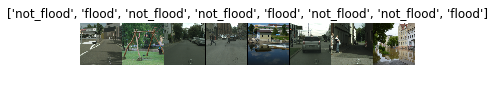

Prediction:


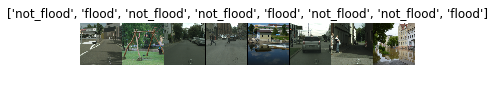

In [13]:
visualize_model(rn18_trained, test_data)

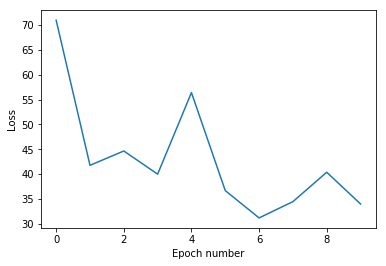

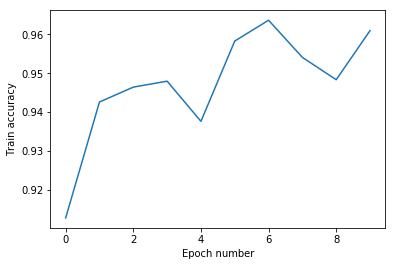

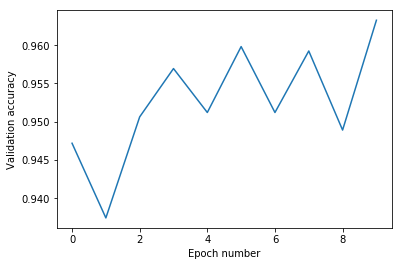

<Figure size 432x288 with 0 Axes>

In [14]:
# graph loss curve
plt.plot(np.arange(10), loss_hist)
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()
plt.savefig('rn18_loss_curve.png')

#graph train accuracy
plt.plot(np.arange(10), train_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Train accuracy')
plt.show()
plt.savefig('rn18_train_acc_curve.png')

plt.plot(np.arange(10), val_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Validation accuracy')
plt.show()
plt.savefig('rn18_val_acc_curve.png')

In [7]:
model = torch.load('rn_train.pt')